In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("clean_sales_data.csv")
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,category,sub_category,product_name,sales,quantity,discount,profit,profit_margin,order_year,order_month
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,0.16,2017,11
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,0.30,2017,11
2,3,CA-2017-138688,2017-06-12,6/16/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,0.47,2017,6
3,4,US-2016-108966,2016-10-11,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,-0.40,2016,10
4,5,US-2016-108966,2016-10-11,10/18/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,0.11,2016,10


In [3]:
row=df.shape[0]
col=df.shape[1]
print(f"Number of rows: {row}")
print(f"Number of columns: {col}")

Number of rows: 9994
Number of columns: 24


In [4]:
df.dtypes

row_id             int64
order_id             str
order_date           str
ship_date            str
ship_mode            str
customer_id          str
customer_name        str
segment              str
country              str
city                 str
state                str
postal_code      float64
region               str
product_id           str
category             str
sub_category         str
product_name         str
sales            float64
quantity         float64
discount         float64
profit           float64
profit_margin    float64
order_year         int64
order_month        int64
dtype: object

In [5]:
null=df.isnull().sum()
print(null)

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
profit_margin     0
order_year        0
order_month       0
dtype: int64


In [6]:
row=df["row_id"].unique()
print(f"Number of unique row_id: {len(row)}")

Number of unique row_id: 9994


In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   str    
 2   order_date     9994 non-null   str    
 3   ship_date      9994 non-null   str    
 4   ship_mode      9994 non-null   str    
 5   customer_id    9994 non-null   str    
 6   customer_name  9994 non-null   str    
 7   segment        9994 non-null   str    
 8   country        9994 non-null   str    
 9   city           9994 non-null   str    
 10  state          9994 non-null   str    
 11  postal_code    9983 non-null   float64
 12  region         9994 non-null   str    
 13  product_id     9994 non-null   str    
 14  category       9994 non-null   str    
 15  sub_category   9994 non-null   str    
 16  product_name   9994 non-null   str    
 17  sales          9994 non-null   float64
 18  quantity       9994

In [8]:
df.describe()

,row_id,postal_code,sales,quantity,discount,profit,profit_margin,order_year,order_month
count,9994.000000,9983.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55245.233297,229.858001,3.789574,0.156203,28.656896,0.120236,2016.722233,7.809686
std,2885.163629,32038.715955,623.245101,2.225110,0.206452,234.260108,0.466717,1.123555,3.284654
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-2.750000,2015.000000,1.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,0.080000,2016.000000,5.000000
50%,4997.500000,57103.000000,54.490000,3.000000,0.200000,8.666500,0.270000,2017.000000,9.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,0.360000,2018.000000,11.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,0.500000,2018.000000,12.000000


In [9]:
df["profit_margin_pct"] = df["profit_margin"] * 100
df["discount_pct"] = df["discount"] * 100



In [10]:
total_sales = df["sales"].sum().round(2)
total_profit = df["profit"].sum().round(2)
total_quantity = df["quantity"].sum().round(2)
print(f"Total Sales: {total_sales}")
print(f"Total Profit: {total_profit}")
print(f"Total quantity sold: {total_quantity}")


Total Sales: 2297200.86
Total Profit: 286397.02
Total quantity sold: 37873.0


In [11]:
average_sales = df["sales"].mean().round(2)
average_profit = df["profit"].mean().round(2)
average_quantity = df["quantity"].mean().round(2)
average_discount = df["discount_pct"].mean().round(2)
print(f"Average Sales per order: {average_sales}")
print(f"Average Profit per order: {average_profit}")
print(f"Average quantity sold per order: {average_quantity}")
print(f"Average discount percentage: {average_discount}")

Average Sales per order: 229.86
Average Profit per order: 28.66
Average quantity sold per order: 3.79
Average discount percentage: 15.62


In [12]:
product_revenue = (df.groupby("product_name", as_index=False).agg({"sales": "sum", "quantity": "sum"}).sort_values("sales", ascending=False))

print("Highest revenue product:") 
product_revenue.head(1)

Highest revenue product:


,product_name,sales,quantity
404,Canon imageCLASS 2200 Advanced Copier,61599.824,20.0


In [13]:
product_category=(df.groupby("category", as_index=False).agg({"sales": "sum", "quantity": "sum"}).sort_values("sales", ascending=False).round(2))
print("Highest revenue product category:")
product_category.head(1)

Highest revenue product category:


,category,sales,quantity
2,Technology,836154.03,6939.0


In [14]:
lowest_product_category=(df.groupby("category", as_index=False).agg({"sales": "sum", "quantity": "sum"}).sort_values("sales", ascending=True).round(2))
print("Lowest revenue product category:")
lowest_product_category.head(1)

Lowest revenue product category:


,category,sales,quantity
1,Office Supplies,719047.03,22906.0


In [15]:
product_category=(df.groupby("category", as_index=False).agg({"sales": "sum", "quantity": "sum"}).sort_values("sales", ascending=False).round(2))
print("Category Ascending order per sales:")
product_category.head(3)

Category Ascending order per sales:


,category,sales,quantity
2,Technology,836154.03,6939.0
0,Furniture,741999.80,8028.0
1,Office Supplies,719047.03,22906.0


In [16]:
highest_quantity=df.groupby("product_name", as_index=False).agg({"quantity": "sum", "sales":"sum"}).sort_values("quantity", ascending=False)
print("Product with highest quantity sold:")
highest_quantity.head(1)

Product with highest quantity sold:


,product_name,quantity,sales
1499,Staples,215.0,755.47


In [17]:
highest_profit=df.groupby("product_name", as_index=False)["profit"]. sum().sort_values("profit", ascending=False).round(2)
print("Product with highest profit:")   
highest_profit.head(1)



Product with highest profit:


,product_name,profit
404,Canon imageCLASS 2200 Advanced Copier,25199.93


In [18]:
lowest_profit=df.groupby("product_name", as_index=False).agg({"profit": "sum", "quantity": "sum"}).sort_values("profit", ascending=True)
print("Product with Highest loss:")
lowest_profit.head(1)

Product with Highest loss:


,product_name,profit,quantity
475,Cubify CubeX 3D Printer Double Head Print,-8879.9704,9.0


In [19]:
total_loss_count=df[df["profit"] < 0].shape[0]
print(f"Total loss making products: {total_loss_count}")
total_profit_count=df[df["profit"] > 0].shape[0]
print(f"Total profit making products: {total_profit_count}")

Total loss making products: 1871
Total profit making products: 8058


In [20]:
highest_discount=df.groupby("product_name", as_index=False).agg({"discount_pct": "mean","sales": "sum", "quantity": "sum"}).sort_values("discount_pct", ascending=False)
print("Product with highest average discount percentage:")
highest_discount.head(1)

Product with highest average discount percentage:


,product_name,discount_pct,sales,quantity
605,Eureka Disposable Bags for Sanitaire Vibra Gro...,80.0,1.624,2.0


In [21]:
customer_orders=df.groupby("customer_id", as_index=False).agg({"order_id": "nunique", "sales": "sum","customer_name":"first"}).sort_values("sales", ascending=False)
print("Customer with highest sales:")
customer_orders.head(1)

Customer with highest sales:


,customer_id,order_id,sales,customer_name
700,SM-20320,5,25043.05,Sean Miller


In [22]:
state_sales=df.groupby("state", as_index=False).agg({"sales": "sum", "quantity": "sum"}).sort_values("sales", ascending=False)
print("State with highest sales:")
state_sales.head(1)

State with highest sales:


,state,sales,quantity
3,California,457687.6315,7667.0


Sales trend over the years:


Text(0.5, 1.0, 'Sales Trend Over the Years')

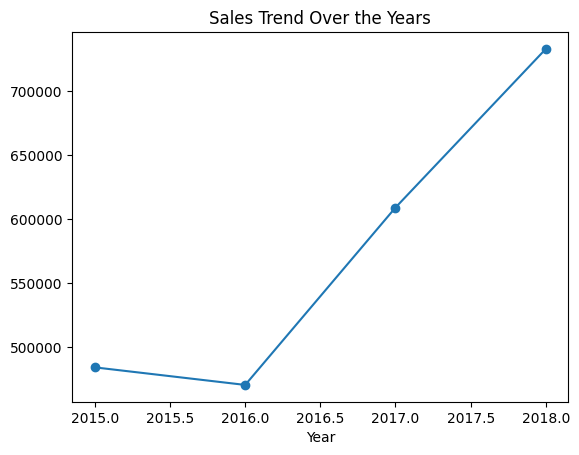

In [23]:
sale_year=df.groupby("order_year", as_index=False).agg({"sales": "sum", "quantity": "sum"}).sort_values("order_year", ascending=True)
print("Sales trend over the years:")

sale_year.head()
plt.plot(sale_year["order_year"], sale_year["sales"], marker="o")
plt.xlabel("Year")
plt.title("Sales Trend Over the Years")


Profit trend over the years:


Text(0.5, 1.0, 'Profit Trend Over the Years')

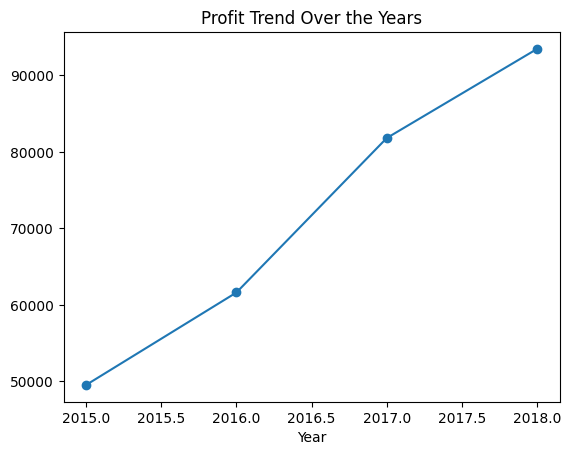

In [24]:
sale_year=df.groupby("order_year", as_index=False).agg({"profit": "sum", "quantity": "sum"}).sort_values("order_year", ascending=True)
print("Profit trend over the years:")

sale_year.head()
plt.plot(sale_year["order_year"], sale_year["profit"], marker="o")
plt.xlabel("Year")
plt.title("Profit Trend Over the Years")


Text(0, 0.5, 'Sales')

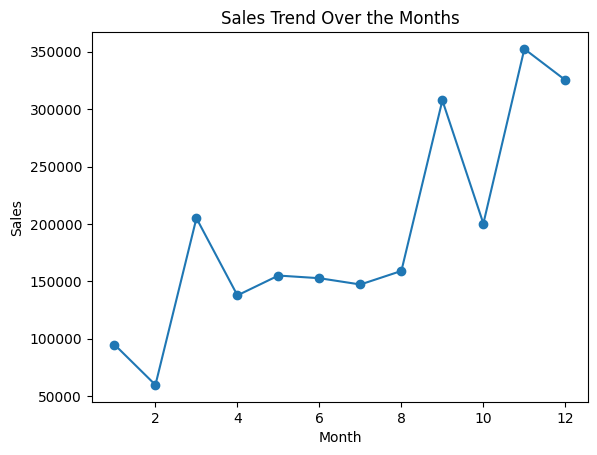

In [25]:
sale_month=df.groupby("order_month", as_index=False).agg({"sales": "sum", "quantity": "sum"}).sort_values("order_month", ascending=True)
plt.plot(sale_month["order_month"], sale_month["sales"], marker="o")
plt.xlabel("Month")
plt.title("Sales Trend Over the Months")
plt.ylabel("Sales")

Text(0, 0.5, 'Average Discount Percentage')

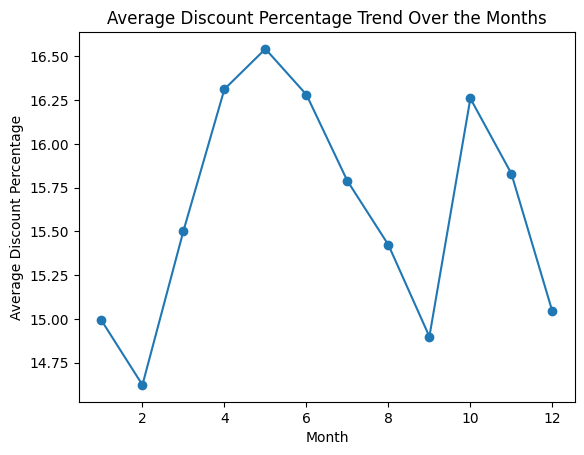

In [26]:
monthly_discount=df.groupby("order_month", as_index=False).agg({"discount_pct": "mean", "sales": "sum", "quantity": "sum"}).sort_values("order_month", ascending=True)
plt.plot(monthly_discount["order_month"], monthly_discount["discount_pct"], marker="o")
plt.xlabel("Month")
plt.title("Average Discount Percentage Trend Over the Months")
plt.ylabel("Average Discount Percentage")


Text(0, 0.5, 'Average Profit Margin Percentage')

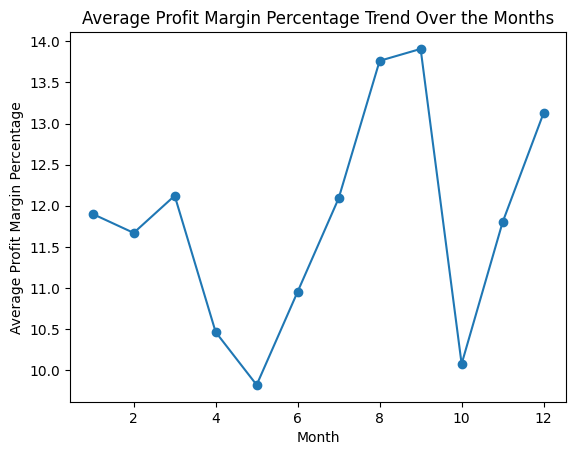

In [27]:
monthly_profit=df.groupby("order_month", as_index=False).agg({"profit_margin_pct": "mean", "sales": "sum", "quantity": "sum"}).sort_values("order_month", ascending=True)
plt.plot(monthly_profit["order_month"], monthly_profit["profit_margin_pct"], marker="o")
plt.xlabel("Month")
plt.title("Average Profit Margin Percentage Trend Over the Months")
plt.ylabel("Average Profit Margin Percentage")


Text(0.5, 1.0, 'Total Sales by Category')

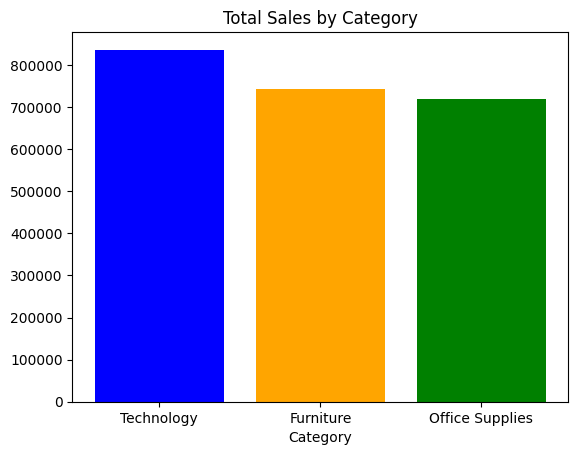

In [28]:
sales_category=df.groupby("category", as_index=False).agg({"sales": "sum", "quantity": "sum"}).sort_values("sales", ascending=False)
plt.bar(sales_category["category"], sales_category["sales"], color=["blue", "orange", "green"])
plt.xlabel("Category")
plt.title("Total Sales by Category")



Text(0.5, 1.0, 'Total Profit by Category')

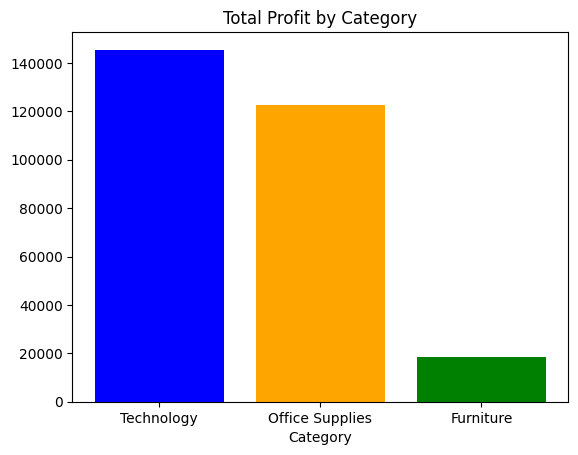

In [29]:
profit_category=df.groupby("category", as_index=False).agg({"profit": "sum", "quantity": "sum"}).sort_values("profit", ascending=False)
plt.bar(profit_category["category"], profit_category["profit"], color=["blue", "orange", "green"])
plt.xlabel("Category")
plt.title("Total Profit by Category")

Text(0.5, 1.0, 'Average Profit Margin Percentage by Category')

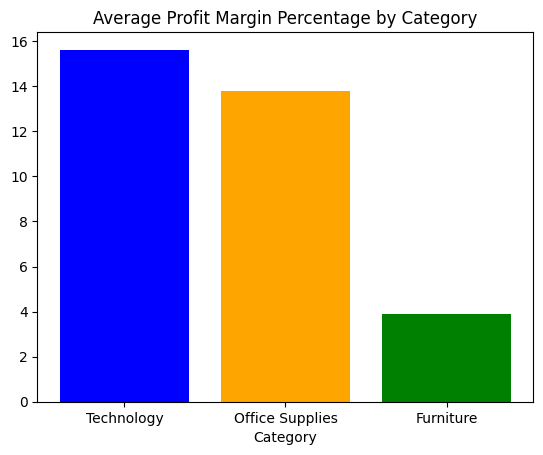

In [30]:
profit_margin_category=df.groupby("category", as_index=False).agg({"profit_margin_pct": "mean", "sales": "sum", "quantity": "sum"}).sort_values("profit_margin_pct", ascending=False)
plt.bar(profit_margin_category["category"], profit_margin_category["profit_margin_pct"], color=["blue", "orange", "green"])
plt.xlabel("Category")
plt.title("Average Profit Margin Percentage by Category")

    

Text(0.5, 1.0, 'Total Loss by Category')

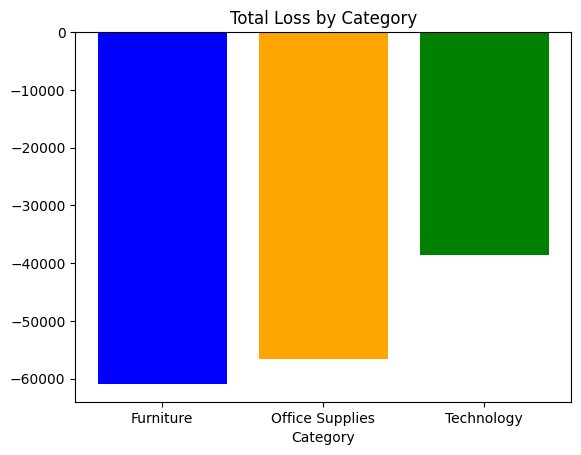

In [31]:
loss_category=df[df["profit"] < 0].groupby("category", as_index=False).agg({"profit": "sum", "quantity": "sum"}).sort_values("profit", ascending=True)
plt.bar(loss_category["category"], loss_category["profit"], color=["blue", "orange", "green"])
plt.xlabel("Category")
plt.title("Total Loss by Category")


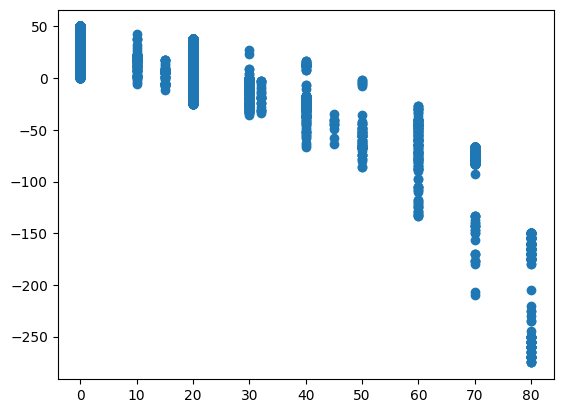

In [32]:
plt.scatter(df["discount_pct"], df["profit_margin_pct"])

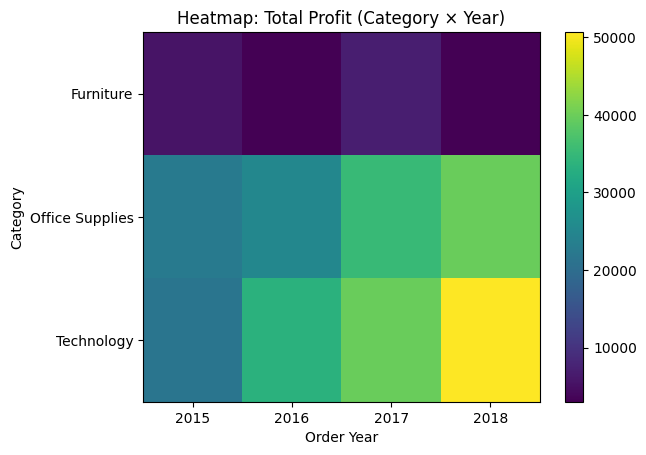

In [33]:
pivot_profit = df.pivot_table(
    index="category",
    columns="order_year",
    values="profit",
    aggfunc="sum",
    fill_value=0
)

plt.figure()
plt.imshow(pivot_profit.values, aspect="auto")
plt.xticks(range(len(pivot_profit.columns)), pivot_profit.columns)
plt.yticks(range(len(pivot_profit.index)), pivot_profit.index)
plt.xlabel("Order Year")
plt.ylabel("Category")
plt.title("Heatmap: Total Profit (Category × Year)")
plt.colorbar()
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Washington'),
  Text(4, 0, 'Pennsylvania'),
  Text(5, 0, 'Florida'),
  Text(6, 0, 'Illinois'),
  Text(7, 0, 'Ohio'),
  Text(8, 0, 'Michigan'),
  Text(9, 0, 'Virginia')])

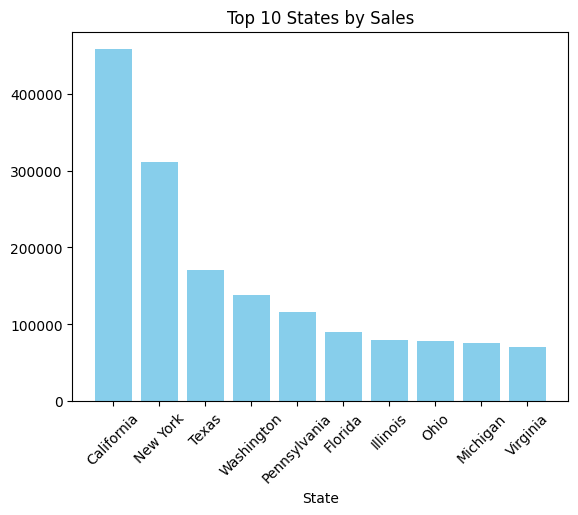

In [34]:
top_states_sales = df.groupby("state", as_index=False).agg({"sales": "sum", "quantity": "sum"}).sort_values("sales", ascending=False).head(10)
plt.bar(top_states_sales["state"], top_states_sales["sales"], color="skyblue")
plt.xlabel("State")
plt.title("Top 10 States by Sales")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'California'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Washington'),
  Text(3, 0, 'Michigan'),
  Text(4, 0, 'Virginia'),
  Text(5, 0, 'Indiana'),
  Text(6, 0, 'Georgia'),
  Text(7, 0, 'Kentucky'),
  Text(8, 0, 'Minnesota'),
  Text(9, 0, 'Delaware')])

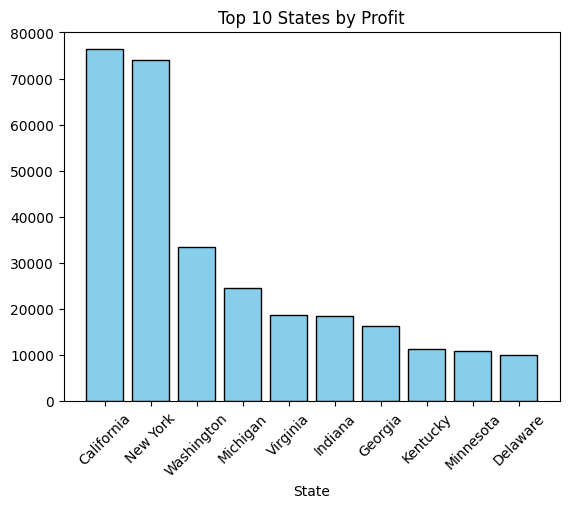

In [35]:
top_states_sales = df.groupby("state", as_index=False).agg({"profit": "sum", "quantity": "sum"}).sort_values("profit", ascending=False).head(10)
plt.bar(top_states_sales["state"], top_states_sales["profit"], color="skyblue", edgecolor="black")
plt.xlabel("State")
plt.title("Top 10 States by Profit")
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sean Miller'),
  Text(1, 0, 'Tamara Chand'),
  Text(2, 0, 'Raymond Buch'),
  Text(3, 0, 'Tom Ashbrook'),
  Text(4, 0, 'Adrian Barton'),
  Text(5, 0, 'Ken Lonsdale'),
  Text(6, 0, 'Sanjit Chand'),
  Text(7, 0, 'Hunter Lopez'),
  Text(8, 0, 'Sanjit Engle'),
  Text(9, 0, 'Christopher Conant')])

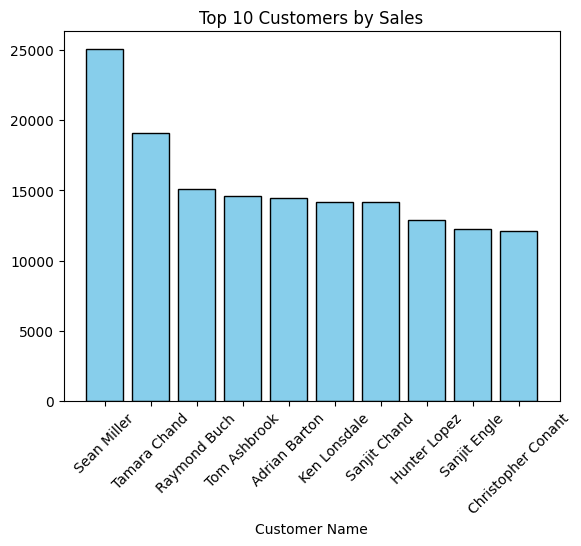

In [36]:
top_customers_sales = df.groupby("customer_id", as_index=False).agg({"sales": "sum", "quantity": "sum", "customer_name": "first"}).sort_values("sales", ascending=False).head(10)
plt.bar(top_customers_sales["customer_name"], top_customers_sales["sales"], color="skyblue", edgecolor="black")
plt.xlabel("Customer Name")
plt.title("Top 10 Customers by Sales")
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Cindy Stewart'),
  Text(1, 0, 'Grant Thornton'),
  Text(2, 0, 'Luke Foster'),
  Text(3, 0, 'Sharelle Roach'),
  Text(4, 0, 'Henry Goldwyn'),
  Text(5, 0, 'Natalie Fritzler'),
  Text(6, 0, 'Nathan Cano'),
  Text(7, 0, 'Sean Braxton'),
  Text(8, 0, 'Christine Phan'),
  Text(9, 0, 'Zuschuss Carroll')])

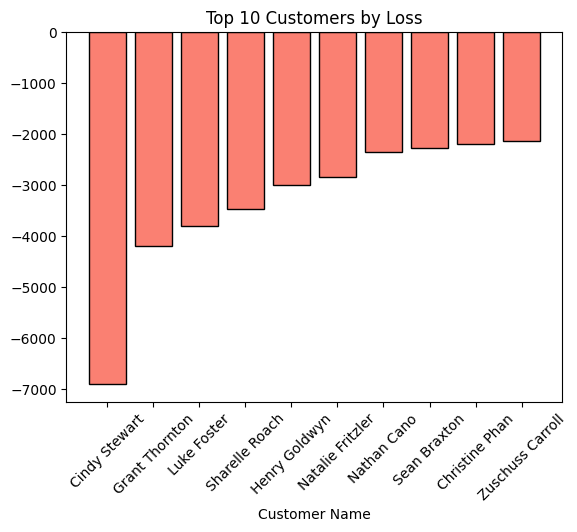

In [37]:
customer_loss = df[df["profit"] < 0].groupby("customer_id", as_index=False).agg({"profit": "sum", "quantity": "sum", "customer_name": "first"}).sort_values("profit", ascending=True).head(10)
plt.bar(customer_loss["customer_name"], customer_loss["profit"], color="salmon", edgecolor="black")
plt.xlabel("Customer Name")
plt.title("Top 10 Customers by Loss")
plt.xticks(rotation=45)

In [38]:
state_abbrev = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT",
    "Delaware": "DE", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN",
    "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA",
    "Michigan": "MI", "Minnesota": "MN", "Mississippi": "MS",
    "Missouri": "MO", "Montana": "MT", "Nebraska": "NE",
    "Nevada": "NV", "New Hampshire": "NH", "New Jersey": "NJ",
    "New Mexico": "NM", "New York": "NY", "North Carolina": "NC",
    "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI",
    "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
    "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA",
    "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI",
    "Wyoming": "WY"
}

df["state_code"] = df["state"].map(state_abbrev)


In [39]:
import plotly.express as px
state_profit = (
    df.groupby("state_code", as_index=False)
      .agg(total_profit=("profit", "sum"))
)

fig = px.choropleth(
    state_profit,
    locations="state_code",
    locationmode="USA-states",
    color="total_profit",
    color_continuous_scale="RdBu",
    scope="usa",
    title="Profit and Loss by State"
)

fig.show()
